# Loan Application Status Prediction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

# Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')
df                                                  #loading dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df=pd.DataFrame(data=df)                   #giving structural format to dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA(Exploratory data analysis):

In [4]:
df.shape        #there are 614 rows and 13 column in dataset

(614, 13)

In [5]:
df.columns                        #names of columns present in dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# About columns:

1. Loan ID: Loan ID is the ID of the applicant file in the bank
    

2. Gender:  sex of the person who is having aplication in the bank for loan
    

3. Married: status of the person such as married, single, divorced and widowed
    

4. Dependants: number of dependants or the family member who is dependant of the loan holder


5. Education: Education of the loan holder
    

6. Self_employed: giving information about the job profile of the person or the information regarding business of the person
    

7. ApplicantIncome: applicant income or salary
    

8. CoapplicantIncome: if the person has coapplicant on the file, it is giving the coapplicant income information
    

9. LoanAmount: the total loan amount the person took from the bank
    

10. Loan Amount term: loan amount term
    

11. credit_History: credist history is the information about persons ability to pay loan back
    

12. property_area: area where the property located
    

13.Loan_status: weather loan is approved or not

# checking missing values:

In [6]:
df.isnull().sum()                    #there are few columns with missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

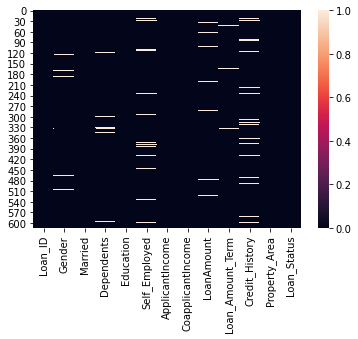

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we can see that, most of the columns has object datatypes and few has float data types, only one column Applicant income is in integer data types

<AxesSubplot:xlabel='Gender', ylabel='count'>

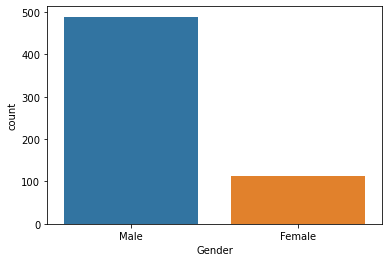

In [9]:
sns.countplot(df['Gender'])

male applicant are 5 times more than female applicant

<AxesSubplot:xlabel='Married', ylabel='count'>

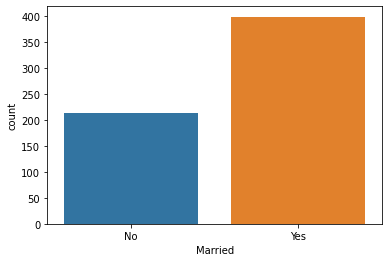

In [10]:
sns.countplot(df['Married'])

married applicant are double than single applicant

<AxesSubplot:xlabel='Married', ylabel='count'>

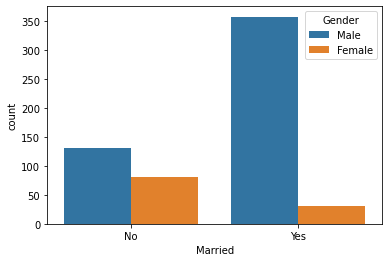

In [11]:
sns.countplot(df["Married"],hue=df["Gender"])

we can see that both married and unmarried males are applying for loan and in case of females unmarried females are applying more than married females

<AxesSubplot:xlabel='Dependents', ylabel='count'>

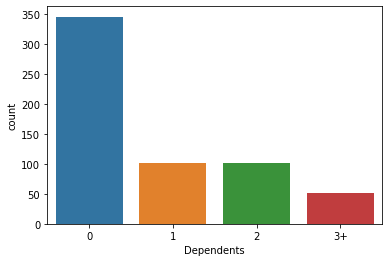

In [13]:
sns.countplot(df['Dependents'])

people with no dependents are applying more for loan. people with 1 and 2 dependents are equal and only few people with 3+ dependents are applying for loan

<AxesSubplot:xlabel='Education', ylabel='count'>

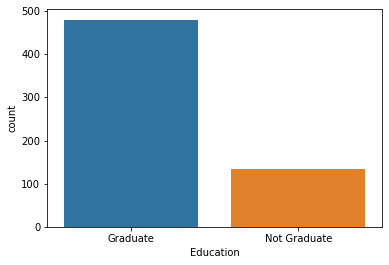

In [15]:
sns.countplot(df['Education'])

most of the people are graduate and near about 110 people who are applying for loan are not graduate

<AxesSubplot:xlabel='Education', ylabel='count'>

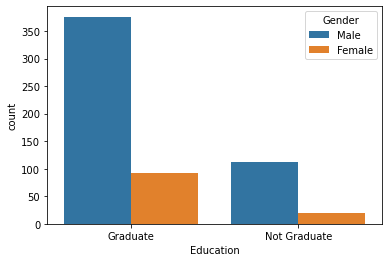

In [16]:
sns.countplot(df['Education'],hue=df['Gender'])

in both graduate and not graduate categories males are more than females

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

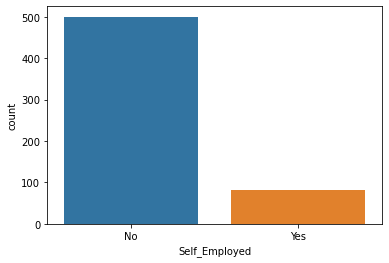

In [18]:
sns.countplot(df['Self_Employed'])

there are large number of loan applicant who is not self employed only few are self employed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

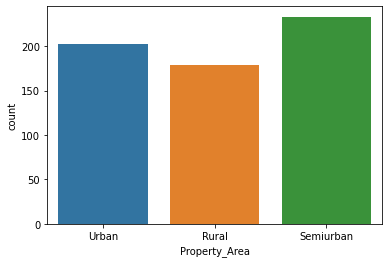

In [20]:
sns.countplot(df['Property_Area'])

Most of the properties located in semiurban area, rural has less properties

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

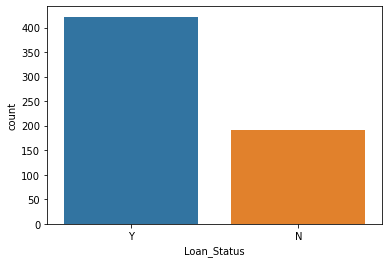

In [21]:
sns.countplot(df['Loan_Status'])

more than double loan application are getting approved 

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

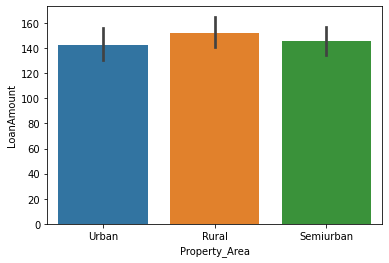

In [25]:
sns.barplot(x=df['Property_Area'],y=df['LoanAmount'])

Most of the loan amount is for rural properties

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

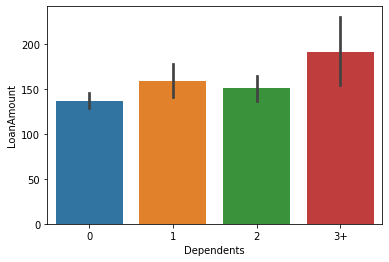

In [26]:
sns.barplot(x=df['Dependents'],y=df['LoanAmount'])

mostly people with  3+ dependents are applied for more amount of loan

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

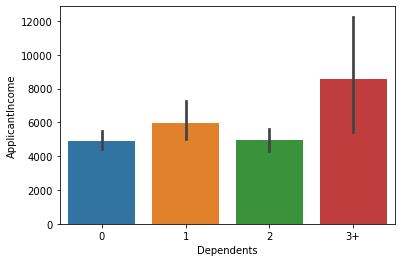

In [27]:
sns.barplot(x=df['Dependents'],y=df['ApplicantIncome'])

applicant with more dependents has more income and that is the reason why they are applying for more loan to manage big family

# Filling missing values in the columns

In [28]:
df["Gender"]=df['Gender'].fillna(df['Gender'].mode()[0])
df["Married"]=df['Married'].fillna(df['Married'].mode()[0])
df["Dependents"]=df['Dependents'].fillna(df['Dependents'].mode()[0])
df["Self_Employed"]=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df["LoanAmount"]=df['LoanAmount'].fillna(df['LoanAmount'].median())
df["Loan_Amount_Term"]=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df["Credit_History"]=df['Credit_History'].fillna(df['Credit_History'].median())

# Filling the Missing values with median and mode to treat the null values

In [29]:
df.isnull().sum()

# As we can see now we dont have any missing values left and all null values has been treated

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outlier detection:

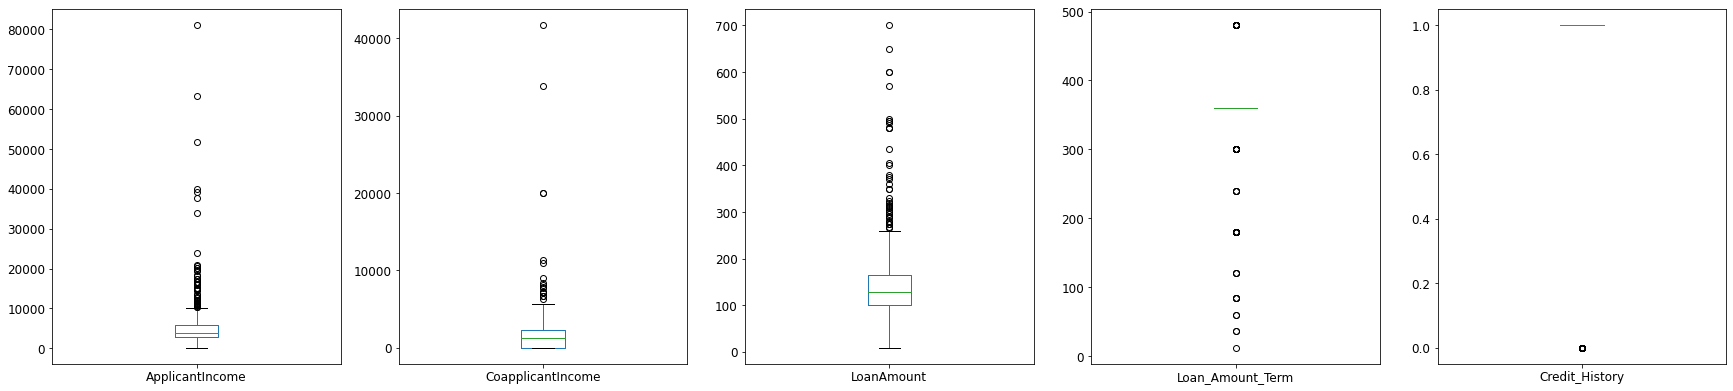

In [30]:
df.plot(kind="box", subplots=True, layout=(4,5), figsize=(30,30), fontsize=12)
plt.show()

# The Boxplots showing many outlier values present in the different columns of the dataset

# Skewness:

In [31]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

The data is highly skewed 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

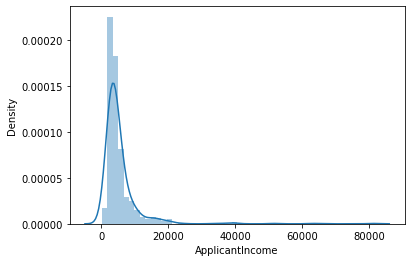

In [32]:
sns.distplot(df["ApplicantIncome"])

The Applicant Income column has very high right skewness present in the column  

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

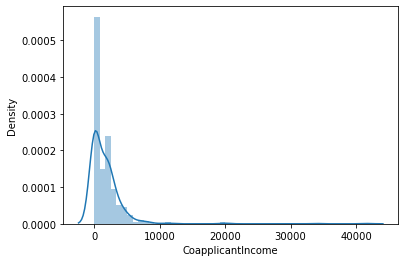

In [33]:
sns.distplot(df["CoapplicantIncome"])

The Coapplicant Income column has very high right skewness present in the column  

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

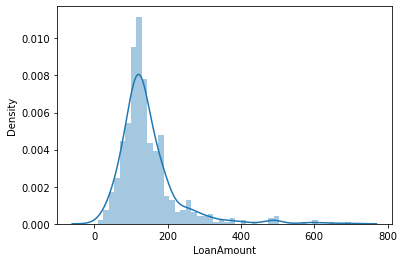

In [34]:
sns.distplot(df["LoanAmount"])

The Loan Amount column has very high right skewness present in the column 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

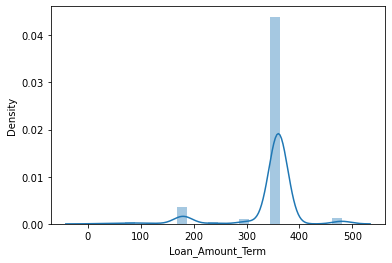

In [35]:
sns.distplot(df["Loan_Amount_Term"])

The Loan Amount Term column has very high left skewness present in the column 

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

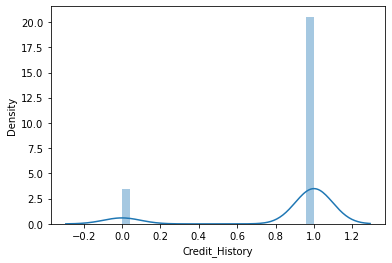

In [36]:
sns.distplot(df["Credit_History"])

The Credit History column has very high left skewness present in the column 

# Describing dataset:

In [37]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [39]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


# Data cleaning:

In [40]:
df.drop(columns=["Loan_ID"],inplace=True)

The Columns are not important variables for model training so we can drop them

# Label Encoder:

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in loan application dataset

In [44]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Removing Outliers:

In [45]:
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [46]:
z.shape

(614, 12)

In [47]:
#We are taking threshold=3
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [53]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


In [49]:
df.shape                             #shape of dataset with outliers

(614, 12)

In [50]:
df_new.shape                         #shape of nw dataset without outliers

(577, 12)

In [51]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Picking all the Dataset with zscore of Standard Deviation 3 or less and assigning it to new variable "df_new"

# Percentage Data loss:

In [54]:
Data_loss=((614-577)/614)*100
Data_loss

6.026058631921824

# Skewness removal:

# splitting the independent and target variable in x and y before removing skewness

In [55]:
x=df_new.iloc[:,:-1]
x                             #taking all independent variable into x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [56]:
y=df_new.iloc[:,-1]
y                                   #taking dependent variable into y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [57]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [58]:
# Checking the skewness of all independent variables
# Mostly all columns are highly skewed, Normal Range = +0.5 to -0.5

In [59]:
from sklearn.preprocessing import power_transform

# Importing the power_transform function to reduce the over skewness in dataset

In [60]:
x_new=power_transform(x)
df_new=pd.DataFrame(x_new,columns=x.columns)

# Applying power_transform function and making new data frame of modified skewness dataset

In [61]:
df_new.skew()
# New and improved skewness is what we are getting after applying power_transform function

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

In [62]:
x=df_new 

# Saving the df_new variable in x as it contains the transformed data 

In [63]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [64]:
x.shape

(577, 11)

In [65]:
y.shape

(577,)

In [66]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.130788,0.418513,1.194806


# Applying standard scaler:

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [68]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

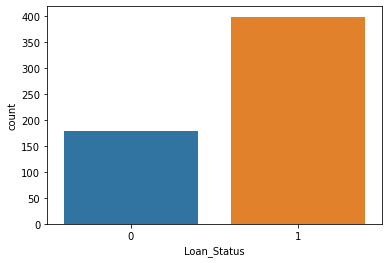

In [69]:
sns.countplot(y)

There is class imbalance issue in target column

# Applying SMOTE:

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Resampling the x and y to make the class balanced and saving the new x and y in x and y again

In [72]:
y.value_counts()                 # Now we can see that both the classes are balanced without losing any data

0    398
1    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

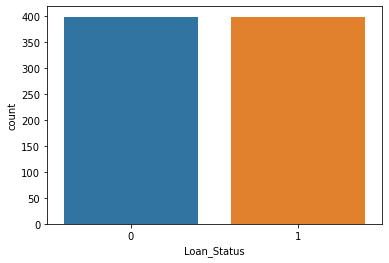

In [73]:
sns.countplot(y)                 # Now we can see that both the classes are balanced without losing any data

In [74]:
x.shape

(796, 11)

In [75]:
y.shape

(796,)

# finding the random state:

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0

for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracy score is: ', maxAccu, 'at random state: ', maxRS)

Best accuracy score is:  0.825 at random state:  190


we found our best random state 190, we will create our train test split using this random state

# Creating train test split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=190)

In [78]:
x_train.shape

(636, 11)

In [79]:
x_test.shape

(160, 11)

In [80]:
y_train.shape

(636,)

In [81]:
y_test.shape

(160,)

# Model Building:

# Logistic regression:

In [82]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score:", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score: 82.5
[[54 23]
 [ 5 78]]
              precision    recall  f1-score   support

           0       0.92      0.70      0.79        77
           1       0.77      0.94      0.85        83

    accuracy                           0.82       160
   macro avg       0.84      0.82      0.82       160
weighted avg       0.84      0.82      0.82       160



# Decision tree classifier:

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score:  83.125
[[66 11]
 [16 67]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.86      0.81      0.83        83

    accuracy                           0.83       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.83      0.83       160



# Support vector classifier:

In [84]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score:  85.0
[[61 16]
 [ 8 75]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.84        77
           1       0.82      0.90      0.86        83

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160



# Random forest classifier:

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy score:", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score: 88.75
[[63 14]
 [ 4 79]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        77
           1       0.85      0.95      0.90        83

    accuracy                           0.89       160
   macro avg       0.89      0.88      0.89       160
weighted avg       0.89      0.89      0.89       160



# KNeighbors classifier:

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
predknn= knn.predict(x_test)
print('accuracy score :',accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score : 80.625
[[66 11]
 [20 63]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        77
           1       0.85      0.76      0.80        83

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



# ExtraTrees Classifier:

In [94]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

etc.fit(x_train,y_train)
predet = etc.predict(x_test)
print('accuracy score :',accuracy_score(y_test,predet)*100)
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

accuracy score : 88.75
[[66 11]
 [ 7 76]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        77
           1       0.87      0.92      0.89        83

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160



# AdaBoost Classifier:

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

ada.fit(x_train,y_train)
predada= ada.predict(x_test)
print('accuracy score :',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score : 80.625
[[66 11]
 [20 63]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        77
           1       0.85      0.76      0.80        83

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



from above models we can see that:

    Accuracy score of Logistic regression:            82.5%

    Accuracy score of Decision tree classification:   83.1%
    
    Accuracy score of Support vector classifier:      85.0% 

    Accuracy score of Random forest classifier:       88.7%

    Accuracy score of KNeighbors classifier:          80.6% 
    
    Accuracy score of ExtraTrees classifier:          88.7%
    
    Accuracy score of AdaBoost classifier:            80.6%
    
    

# CROSS VALIDATION:

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
scr1=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of Logistic Regression model is: ", scr1.mean())

Cross validation score of Logistic Regression model is:  0.721132075471698


In [90]:
scr2=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of Decision Tree classifier model is: ", scr2.mean())

Cross validation score of Decision Tree classifier model is:  0.7462735849056604


In [91]:
scr3=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of Support vector classifier is: ", scr3.mean())

Cross validation score of Support vector classifier is:  0.74125


In [92]:
scr4=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest classifier is: ", scr4.mean())

Cross validation score of Random Forest classifier is:  0.8141430817610062


In [93]:
scr5=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of KNeighbors classifier is: ", scr5.mean())

Cross validation score of KNeighbors classifier is:  0.755070754716981


In [96]:
scr6=cross_val_score(etc,x,y,cv=5)
print("Cross validation score of ExtraTrees classifier is: ", scr6.mean())

Cross validation score of ExtraTrees classifier is:  0.8330031446540881


In [98]:
scr7=cross_val_score(ada,x,y,cv=5)
print("Cross validation score of AdaBoost classifier is: ", scr7.mean())

Cross validation score of AdaBoost classifier is:  0.7463128930817611


# ExtraTrees Classifier model is performing well as it has high cross val score of 83.3% and high accuracy score of 88.7%. (or least diff between cross val score and accuracy score. i.e, 5.4%)

# Hyper parameter tunning:

In [103]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV

parameter={"max_depth":np.arange(2,10), 
           "criterion":["gini","entropy"],
           "min_samples_split":np.arange(2,10),
          "min_samples_leaf":np.arange(2,10)}


# Setting the Parameters to apply to GridSearchCV to get the best parameter score

In [104]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5,scoring="accuracy")

GCV.fit(x_train,y_train)         #fitting data in model

GCV.best_params_                 #Printing the best parameters found by GridSearchCV

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [106]:
GCV_pred=GCV.best_estimator_.predict(x_test)   #predicting with best parameters

accuracy_score(y_test,GCV_pred)*100                  #checking final accuracy

85.0

# Final Accuracy is 85%

# ROC AUC curve:

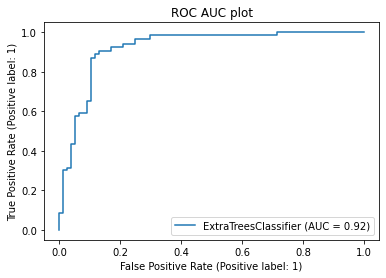

In [107]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Auc score is 92% and final accuracy is 85%

# Saving the ExtraTrees Classifier Model (Serialization):-

In [108]:
import joblib

# Importing the joblib library to perform Serialization of the Final Model

In [109]:
joblib.dump(GCV.best_estimator_,"Loan_application_model.pkl")

['Loan_application_model.pkl']